Population data United Nations (Source: data.un.org, state 24/03/2022

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_UNdata = pd.read_csv('UNdata_Export_20220324_103742847.csv')
df_UNdata.head()

,Country or Area,Year(s),Variant,Value
0,Georgia,2100,Medium,2514.136
1,Georgia,2100,High,4003.322
2,Georgia,2100,Low,1434.441
3,Georgia,2100,Constant fertility,2998.942
4,Georgia,2100,Instant replacement,3059.200


In [3]:
df_UNdata.drop(columns = 'Country or Area', inplace = True)
#df_UNdata.head()

In [4]:
#df_UNdata.head(10)

In [5]:
mylist = []
for x in range(2022,2101) :
    mylist.append(x)

In [6]:
df_UNdata.set_index('Year(s)', inplace = True)
df_UNdata.drop(index = mylist, inplace = True)
#df_UNdata.head(10)

In [7]:
df_UNdata.reset_index(inplace = True)
df_UNdata.set_index('Variant', inplace = True)
df_UNdata.drop(index = ['High','Low', 'Constant fertility', 'Instant replacement', 'Instant replacement', 'Zero migration', 'Constant mortality', 'No change', 'Momentum'], inplace = True)
#df_UNdata.head(10)

In [8]:
df_UNdata.reset_index(inplace = True)
df_UNdata.rename(columns={'Year(s)': 'Year'}, inplace = True)

In [9]:
df_UNdata.drop(columns = 'Variant', inplace = True)

In [10]:
df_UNdata.rename(columns={'Value': 'Population'}, inplace = True)

In [11]:
df_UNdata['Population'] = df_UNdata['Population']*1000

In [12]:
df_UNdata.head()

,Year,Population
0,2021,3979765.0
1,2020,3989167.0
2,2019,3996765.0
3,2018,4002942.0
4,2017,4008716.0


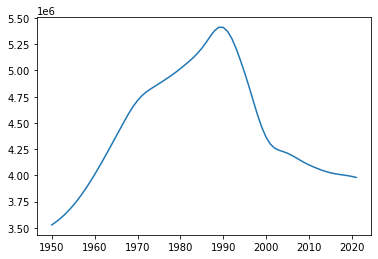

In [13]:
fig = plt.plot(df_UNdata['Year'], df_UNdata['Population'])

Population data Georgia (Source: https://geostat.ge/media/38040/01---population-by-self-governed-unit.xlsx)

In [14]:
df_Population = pd.read_excel('01---population-by-self-governed-unit.xlsx', header = 3)

In [15]:
df_Population

,"regions, self-governed units",1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Georgia,4929.900,4742.251,4573.192,4410.205,4289.620,4197.593,4116.790,4037.472,3991.273,...,3739.323,3718.424,3716.911,3721.916,3728.636,3726.374,3729.633,3723.464,3716.858,3728.573
1,C. Tbilisi Municipality,1250.700,1205.305,1164.366,1131.380,1103.136,1085.238,1072.797,1062.203,1062.157,...,1091.2,1092.003,1101.203,1115.689,1131.962,1145.474,1158.677,1171.079,1184.818,1202.731
2,Abkhazia A.R.,2.013,2.011,2.008,1.997,1.990,1.983,1.974,1.965,1.633,...,-,-,-,-,-,-,-,-,-,-
3,Ajara Municipality,2.013,2.011,2.008,1.997,1.990,1.983,1.974,1.965,1.633,...,-,-,-,-,-,-,-,-,-,-
4,Adjara A.R.,423.000,410.980,391.581,374.016,366.348,360.033,352.976,347.434,342.088,...,331.853,332.471,333.236,336.629,340.186,343.017,346.347,349.028,351.892,354.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Khashuri Municipality,64.200,62.055,60.630,59.030,58.058,57.289,57.057,58.362,58.090,...,53.288,52.998,52.811,52.692,52.571,52.29,52.12,51.728,51.301,51.028
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,- Occupied territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,* Data is included into the relevant municipal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mask = df_Population['regions, self-governed units'].str.contains('Municipality')

In [17]:
df_Population.insert(1, 'Municipality', mask, True)

In [18]:
df_Population.head()

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Georgia,False,4929.900,4742.251,4573.192,4410.205,4289.620,4197.593,4116.790,4037.472,...,3739.323,3718.424,3716.911,3721.916,3728.636,3726.374,3729.633,3723.464,3716.858,3728.573
1,C. Tbilisi Municipality,True,1250.700,1205.305,1164.366,1131.380,1103.136,1085.238,1072.797,1062.203,...,1091.2,1092.003,1101.203,1115.689,1131.962,1145.474,1158.677,1171.079,1184.818,1202.731
2,Abkhazia A.R.,False,2.013,2.011,2.008,1.997,1.990,1.983,1.974,1.965,...,-,-,-,-,-,-,-,-,-,-
3,Ajara Municipality,True,2.013,2.011,2.008,1.997,1.990,1.983,1.974,1.965,...,-,-,-,-,-,-,-,-,-,-
4,Adjara A.R.,False,423.000,410.980,391.581,374.016,366.348,360.033,352.976,347.434,...,331.853,332.471,333.236,336.629,340.186,343.017,346.347,349.028,351.892,354.905


In [19]:
mask = df_Population['regions, self-governed units'].str.contains('Municipality')

In [20]:
df_Population.at[1,'Municipality'] = False

In [21]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Telavi*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
30,C. Telavi*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.788,19.829,19.751,NaN,NaN,NaN,NaN


In [22]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Mtskheta*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,C. Mtskheta*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.799,7.74,7.67,NaN,NaN,NaN,NaN


In [23]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Ambrolauri*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
47,C. Ambrolauri*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.09,2.066,2.047,NaN,NaN,NaN,NaN


In [24]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Zugdidi*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
53,C. Zugdidi*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.81,43.386,42.734,NaN,NaN,NaN,NaN


In [25]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Akhaltsikhe*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
64,C. Akhaltsikhe*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.283,16.425,16.57,NaN,NaN,NaN,NaN


In [26]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Gori*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
80,C. Gori*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,47.754,47.364,46.946,NaN,NaN,NaN,NaN


In [27]:
df_Population.loc[df_Population['regions, self-governed units'] == 'C. Ozurgeti*']

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,C. Ozurgeti*,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.011,14.876,14.759,NaN,NaN,NaN,NaN


In [28]:
df_Population.at[12,'Municipality'] = True
df_Population.at[30,'Municipality'] = True
df_Population.at[40,'Municipality'] = True
df_Population.at[47,'Municipality'] = True
df_Population.at[53,'Municipality'] = True
df_Population.at[64,'Municipality'] = True
df_Population.at[80,'Municipality'] = True

In [29]:
df_Population.tail()

,"regions, self-governed units",Municipality,1994,1995,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
87,Khashuri Municipality,True,64.2,62.055,60.63,59.03,58.058,57.289,57.057,58.362,...,53.288,52.998,52.811,52.692,52.571,52.29,52.12,51.728,51.301,51.028
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,- Occupied territories,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,* Data is included into the relevant municipal...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,** Data is included into the relevant municipa...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_Population.drop([88,89,90,91], inplace = True)

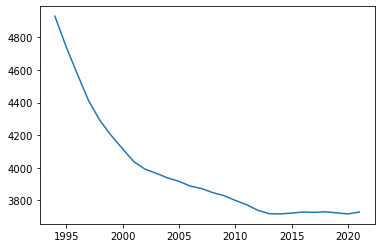

In [31]:
# let's see how the df_Population table looks like
fig1, ax= plt.subplots()
ax.plot(df_Population.loc[0, 1994:2021])

In [32]:
df_PopReg = df_Population[df_Population['Municipality'] == False]
df_PopReg.drop(columns = 'Municipality', inplace = True)
df_PopReg.set_index('regions, self-governed units', inplace = True)
df_PopReg = df_PopReg.T
df_PopReg

C:\Users\sager\AppData\Local\Temp\ipykernel_14448\685219663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PopReg.drop(columns = 'Municipality', inplace = True)


"regions, self-governed units",Georgia,C. Tbilisi Municipality,Abkhazia A.R.,Adjara A.R.,Guria,Imereti,Kakheti,Mtskheta-Mtianeti,Racha-Lechkhumi and Kvemo Svaneti,Samegrelo-Zemo Svaneti,Samtskhe-Javakheti,Kvemo Kartli,Shida Kartli
1994,4929.9,1250.7,2.013,423.0,167.6,786.4,456.3,140.7,61.6,436.087,245.1,622.0,338.4
1995,4742.251,1205.305,2.011,410.98,159.98,764.069,432.696,124.905,58.958,431.973,233.253,592.36,325.761
1996,4573.192,1164.366,2.008,391.581,151.335,740.373,422.653,120.478,55.411,422.046,220.769,565.422,316.75
1997,4410.205,1131.38,1.997,374.016,142.881,718.686,402.405,117.062,52.672,412.779,210.144,538.584,307.599
1998,4289.62,1103.136,1.99,366.348,138.809,696.97,389.887,114.998,50.098,407.597,202.132,516.349,301.306
1999,4197.593,1085.238,1.983,360.033,135.827,677.113,379.917,114.454,48.432,408.948,196.532,493.719,295.397
2000,4116.79,1072.797,1.974,352.976,132.335,658.715,369.763,113.729,46.964,413.198,191.706,472.036,290.597
2001,4037.472,1062.203,1.965,347.434,128.89,642.723,361.003,110.745,45.304,412.556,185.51,454.1,285.039
2002,3991.273,1062.157,1.633,342.088,125.308,632.126,352.736,109.548,44.003,416.349,183.096,443.11,279.119
2003,3965.756,1062.846,1.611,341.041,124.16,622.748,349.15,109.159,43.055,410.611,181.744,441.987,277.644


In [33]:
df_PopMun = df_Population[df_Population['Municipality'] == True]
df_PopMun.drop(columns = 'Municipality', inplace = True)
df_PopMun.set_index('regions, self-governed units', inplace = True)
df_PopMun = df_PopMun.T
#df_PopMun

C:\Users\sager\AppData\Local\Temp\ipykernel_14448\3104860842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PopMun.drop(columns = 'Municipality', inplace = True)


<AxesSubplot:>

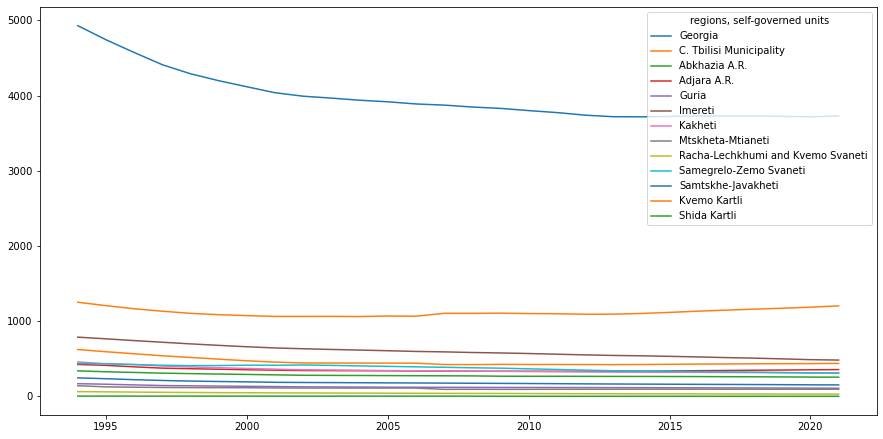

In [34]:
df_PopReg.replace(to_replace = '-', value = 0, inplace = True)
df_PopReg.plot(kind = 'line', figsize=(15, 7.5)) 

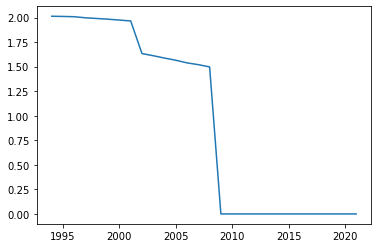

In [35]:
fig10, ax= plt.subplots()
ax.plot(df_PopReg.index.values, df_PopReg['Abkhazia A.R.'])

<AxesSubplot:>

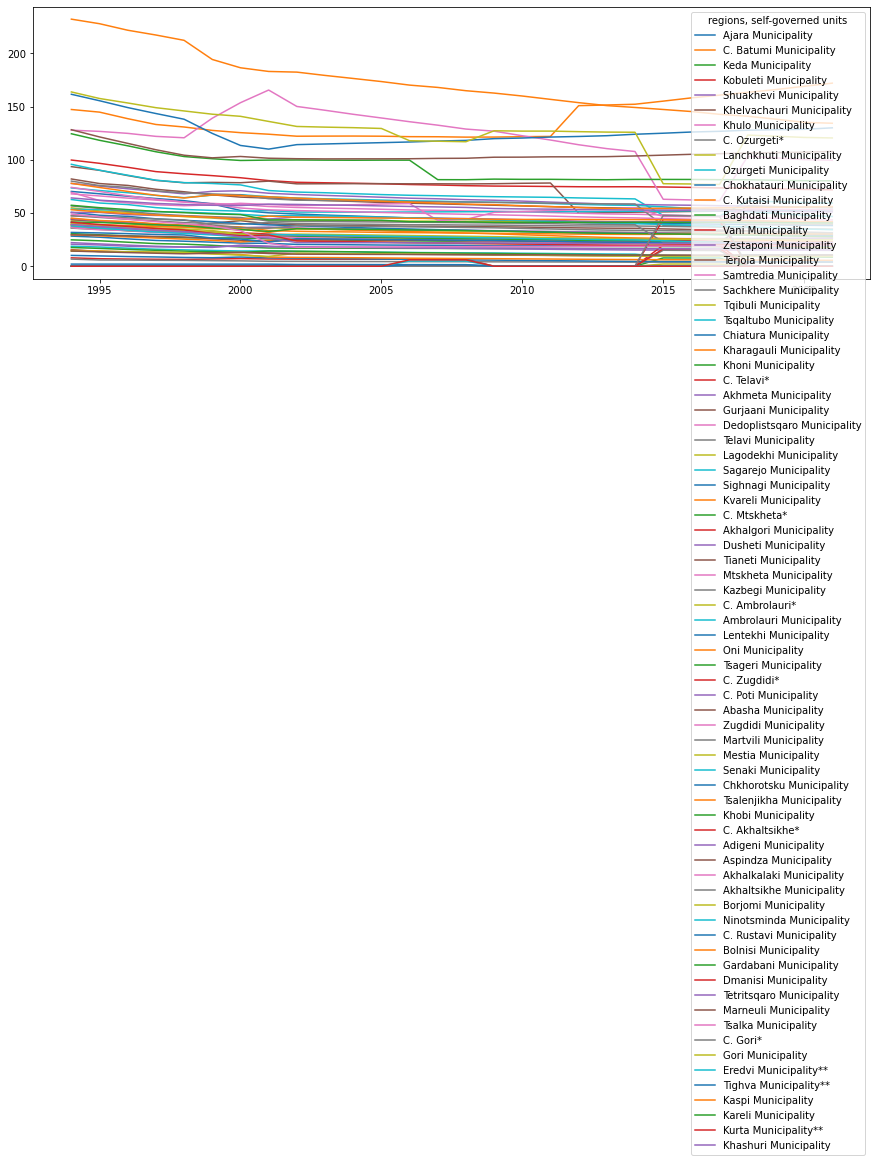

In [36]:
df_PopMun.replace(to_replace = '-', value = 0, inplace = True)
df_PopMun.fillna(0, inplace = True)
df_PopMun.plot(kind = 'line', figsize=(15, 5)) 

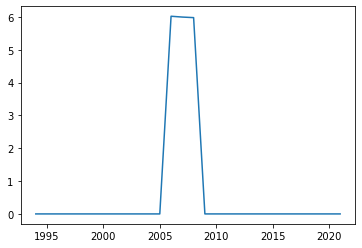

In [37]:
fig10, ax= plt.subplots()
ax.plot(df_PopReg.index.values, df_PopMun['Kurta Municipality**'])

In [38]:
#Map to a chloropeth map
df_PopReg2 = df_PopReg.rename(columns = {"C. Tbilisi Municipality":"Tbilisi", "Racha-Lechkhumi and Kvemo Svaneti":"Racha-Lechkhumi-Kvemo Svaneti","Adjara A.R.":"Ajaria"})
df_PopReg2 = df_PopReg2.T
df_PopReg2.reset_index(inplace = True)
df_PopReg2.drop(index = 0, inplace = True) #remove entry "Georgia" in order to improve scale

In [39]:
import folium
state_geo = "C:/Users/sager/Desktop/GeUa/geo_regions.geojson"
southossetia = "C:/Users/sager/Desktop/GeUa/southossetia.geojson"
MapPop = folium.Map(location=[42.19335024937128, 43.4451901712113], zoom_start=7)

dataStates = df_PopReg2
state_data=pd.DataFrame.from_dict(dataStates)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["regions, self-governed units", 2021],
    key_on="feature.properties.NAME_1",
    fill_color= "OrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    nan_fill_color="blue",
    nan_fill_opacity = 0.2,
    legend_name="Population by Region",
).add_to(MapPop)

folium.GeoJson(
    southossetia,#fill_opacity=1.0, 
    name="geojson"
).add_to(MapPop)
MapPop

### Population by ethnicity (time periods)

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps me to download a web page

In [4]:
url = "https://en.wikipedia.org/wiki/Demographics_of_Georgia_(country)"
dataWiki = requests.get(url).text
soup = BeautifulSoup(dataWiki, "html5lib")

In [5]:
#now let's find the right table (should be either 8 or 9)
tables = soup.find_all('table')
len(tables)

24

In [6]:
for index,table in enumerate(tables):
    if ("Population of Georgia according to ethnic group 1926–2014" in str(table)):
        table_index = index
print(table_index)

9


In [20]:
df_EthnicityTime = pd.read_html(str(tables[9]), flavor='bs4')[0]
df_EthnicityTime

Ethnicgroup  \
                                          Ethnicgroup   
0                                           Georgians   
1                                        Azerbaijanis   
2                                           Armenians   
3                                            Russians   
4                                           Ossetians   
5                                             Yazidis   
6                                               Kurds   
7                                          Ukrainians   
8                                              Greeks   
9                                           Assyrians   
10                                               Jews   
11                                         Abkhazians   
12                                             Others   
13                                              Total   
14  1 Source: [1]. 2 Source: [2]. 3 Source: [3]. 4...   

                                         census 19261  \
                                               Number   
0                                             1788186   
1                                         137,921[41]   
2                                              307018   
3                                               96085   
4                                              113298   
5                                                2262   
6                                                7955   
7                                               14356   
8                                               54051   
9                                                2904   
10                                              30389   
11                                              56847   
12                                              65961   
13                                            2677233   
14  1 Source: [1]. 2 Source: [2]. 3 Source: [3]. 4...   

                                                       \
                                                    %   
0                                                66.8   
1                                                 5.2   
2                                                11.5   
3                                                 3.6   
4                                                 4.2   
5                                                 0.1   
6                                                 0.3   
7                                                 0.5   
8                                                 2.0   
9                                                 0.1   
10                                                1.1   
11                                                2.1   
12                                                2.5   
13                                            2677233   
14  1 Source: [1]. 2 Source: [2]. 3 Source: [3]. 4...   

                                         census 19392  \
                                               Number   
0                                             2173922   
1                                         188,058[42]   
2                                              415013   
3                                              308684   
4                                              147677   
5                                               12915   
6                                               12915   
7                                               45595   
8                                               84636   
9                                                4707   
10                                              42300   
11                                              57805   
12                                              58711   
13                                            3540023   
14  1 Source: [1]. 2 Source: [2]. 3 Source: [3]. 4...   

                                                       \
                                                    %   
0                                               

In [23]:
df_EthnicityTime.rename(columns = {"census 19261":"census 1926", "census 19392": "census 1939", "census 19593": "census 1959", "census 19704": "census 1970", "census 19795": "census 1979", "census 19896": "census 1989", "census 20026": "census 2002", "census 20147": "census 2014"}, inplace = True)

In [25]:
df_EthnicityTime.drop(index = 14, inplace = True)

In [86]:
idx = pd.IndexSlice
df_EthnicityTime.loc[idx[1,("census 1926", "Number")]]

'137,921[41]'

In [88]:
df_EthnicityTime.loc[idx[1,("census 1926", "Number")]] = 137921
df_EthnicityTime.loc[idx[1,("census 1939", "Number")]] = 188058
df_EthnicityTime.loc[idx[1,("census 1939", "Number")]]

188058

In [102]:
temp= df_EthnicityTime.loc[idx[:,"census 1926":"census 2014"]].astype('float')

In [103]:
temp.dtypes

census 1926  Number    float64
             %         float64
census 1939  Number    float64
             %         float64
census 1959  Number    float64
             %         float64
census 1970  Number    float64
             %         float64
census 1979  Number    float64
             %         float64
census 1989  Number    float64
             %         float64
census 2002  Number    float64
             %         float64
census 2014  Number    float64
             %         float64
dtype: object

<AxesSubplot:>

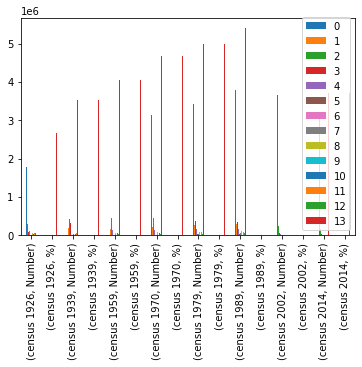

In [109]:
temp.T.plot(kind = 'bar')

In [91]:
df_EthnicityTime.plot(kind = 'line')

TypeError: no numeric data to plot